<a href="https://colab.research.google.com/github/gmatsuna/alura_imersao_gemini_ia/blob/main/imersao_gemini_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Tradutor de Japonês para Português - Leitor de Kanji:***\
*Utilidade:* Facilitar a compreensão de ideogramas japonesas (Kanji), que muitas vezes não são traduzidas corretamente por tradutores convencionais.\
*Criatividade:* Combinar tradução automática neural (NMT) com um dicionário personalizado de expressões idiomáticas japonesas.\
*Eficácia:* Medir a qualidade da tradução considerando a fluência e a precisão na tradução de gírias, comparando com traduções humanas.\
*Apresentação:* Desenvolver uma extensão de navegador ou aplicativo móvel que permita aos usuários capiturar imagens contendo Kanji e compreender o significado do ideiograma.

Configuração.

In [10]:
!pip install -q -U google-generativeai
!pip install pillow

In [11]:
import textwrap
import google.generativeai as genai
import urllib.request
import requests
from io import BytesIO
from PIL import Image
from IPython.display import display
from IPython.display import Markdown
from google.colab import userdata
api_key = userdata.get("SECRET_KEY")
genai.configure(api_key=api_key)

Modelo.

In [12]:
generation_config = {
    "candidate_count": 1,
    "temperature": 0.5
}

In [13]:
safety_settings = {
    "Harassment": "BLOCK_NONE",
    "Hate": "BLOCK_NONE",
    "Sexual": "BLOCK_NONE",
    "Dangerous": "BLOCK_NONE"
}

In [14]:
system_instruction = "Você é um tradutor de Japonês para Português"

In [15]:
model = genai.GenerativeModel(
    model_name='gemini-1.0-pro',
    generation_config= generation_config,
    system_instruction=system_instruction,
    safety_settings= safety_settings
    )
chat = model.start_chat(history=[])

Executando


Copie o link da imagem e cole quando for solicitado.

In [16]:
url = input("Cole a url da imagem contendo o Kanji: ")

Cole a url da imagem contendo o Kanji: https://nihongo-net.com/wp-content/uploads/2020/08/kanji_hon5.jpg


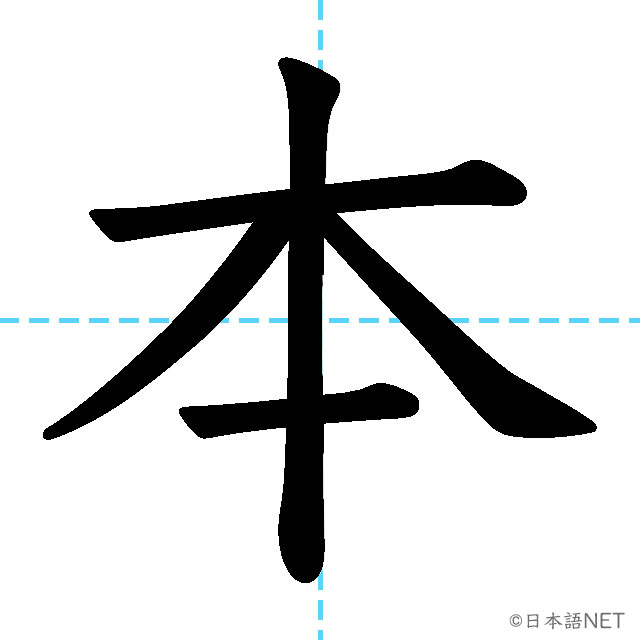

In [17]:
imagem = requests.get(url)
img = Image.open(BytesIO(imagem.content)).convert('RGB')
img

In [18]:
model = genai.GenerativeModel('gemini-pro-vision')
response = model.generate_content(["Qual é o kanji da imagem? Explique com mais detalhes o significado.", img], stream=True)
response.resolve()

def to_markdown(text):
  text = text.replace('"', "'")
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

#Imprimindo o histórico
for message in chat.history:
  display(to_markdown(f"**{message.role}:** {message.parts[0].text}"))
  print()

to_markdown(response.text)

>  O kanji da imagem é **本**.
> 
> **Hon** pode significar:
> 
> - livro
> - caderno
> - raiz
> - base
> - capital
> - principal
> - original
> - genuíno
> - real
> - verdadeiro
> - autêntico
> - essencial
> - fundamental
> - básico
> - importante
> - principal
> - proeminente
> - distinto
> - notável
> - famoso
> - célebre
> - renomado
> - ilustre
> - respeitado
> - venerado
> - adorado
> - reverenciado
> - sagrado
> - divino
> - celestial
> - imperial
> - real
> - nobre
> - aristocrático
> - distinto
> - elegante
> - refinado
> - culto
> - educado
> - inteligente
> - sábio
> - talentoso
> - habilidoso
> - capaz
> -competente
> - eficiente
> - eficaz
> - efetivo
> - bem-sucedido
> - vitorioso
> - triunfante
> - glorioso
> - magnífico
> - esplêndido
> - brilhante
> - radiante
> - cintilante
> - fulgurante
> - refulgente
> - luminoso
> - brilhante
> - claro
> - evidente
> - manifesto
> - ó